# project 1 surpervised learning comparison

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import (roc_curve, auc, roc_auc_score, confusion_matrix)
from sklearn.metrics import  mean_squared_error
from sklearn.metrics import  mean_absolute_error
from sklearn.metrics import  precision_score
from sklearn.metrics import  recall_score
#from pandas.plotting import scattter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = "D:\Github\ML\wine.data"
df_wine = pd.read_csv(file_path, delimiter = ',')
df_wine.columns = ["Class", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols","Flavanoids", "nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"]
df_wine.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


# Part 1: Exploratory Data Analysis: find the missing value, statistics etc

In [3]:
#find the missing values
df_wine.isnull().sum()

Class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

<AxesSubplot:>

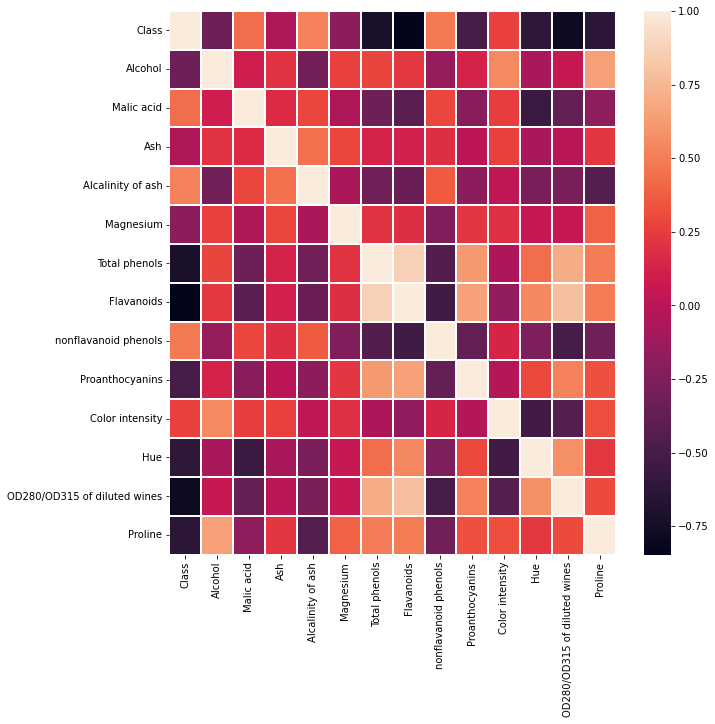

In [4]:
#plot the heatmap to see the correlation between different columns
corrmap = df_wine.corr()
f, ax = plt.subplots(figsize = (10,10))
sns.heatmap(corrmap, ax=ax, linewidth = 0.1)

In [5]:
#drop the Ash columns as it is the least reated to the wine class
df_wine.drop('Ash', axis = 1, inplace = True)

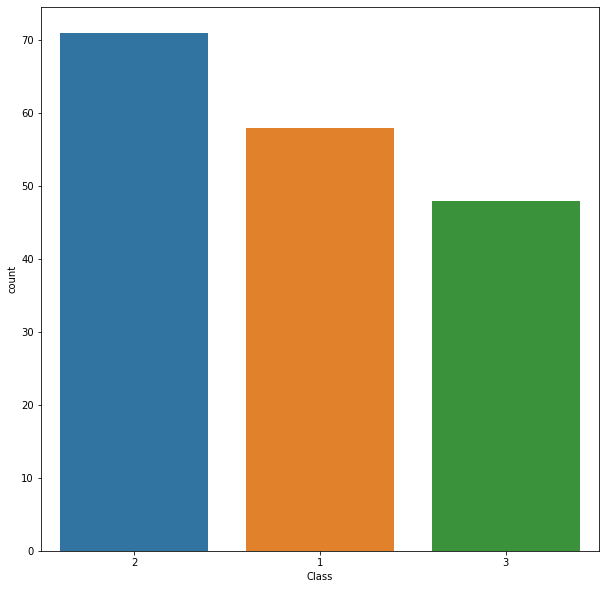

In [6]:
#plot the wine distribution
plt.figure(figsize=(10,10))
sns.countplot(x='Class', data=df_wine, order=df_wine['Class'].value_counts().index);

In [7]:
#create training and testing variables
X = df_wine.drop(['Class'], axis = 1)
y = df_wine['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, shuffle = True)

# part 2: decision tree model classification

In [8]:
#before pruning
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
clf_predict = clf.predict(X_test)
clf_accuracy = accuracy_score(y_test, clf_predict)
mse= mean_squared_error(y_test, clf_predict)
mae = mean_absolute_error(y_test, clf_predict)
pre = precision_score(y_test, clf_predict, average = 'weighted')
rec = recall_score(y_test, clf_predict, average = 'weighted')
print("accuracy =", clf_accuracy)
print("mse=", mse)
print("mae=", mae)
print("pre=", pre)
print("rec=", rec)

accuracy = 0.8888888888888888
mse= 0.1111111111111111
mae= 0.1111111111111111
pre= 0.9069865319865319
rec= 0.8888888888888888


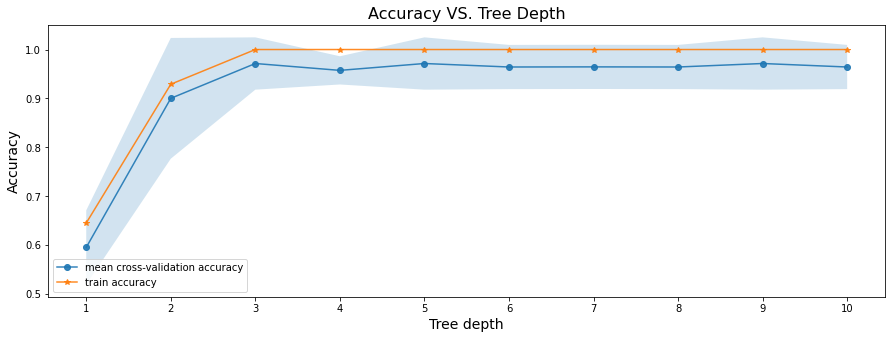

In [9]:
# function for fitting trees of various depths on the training data using cross-validation
def run_cross_validation_on_trees(X, y, tree_depths, cv=5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores
  
# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

# fitting trees of depth 1 to 10
sm_tree_depths = range(1,11)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X_train, y_train, sm_tree_depths)

# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy VS. Tree Depth')



In [10]:
idx_max = sm_cv_scores_mean.argmax()
sm_best_tree_depth = sm_tree_depths[idx_max]
sm_best_tree_cv_score = sm_cv_scores_mean[idx_max]
sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]
print('The depth-{} tree achieves the best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
      sm_best_tree_depth, round(sm_best_tree_cv_score*100,3), round(sm_best_tree_cv_score_std*100, 3)))

The depth-3 tree achieves the best mean cross-validation accuracy 97.143 +/- 2.673% on training dataset


In [11]:
# function for training and evaluating a tree
def run_single_tree(X_train, y_train, X_test, y_test, depth):
    model = DecisionTreeClassifier(max_depth=depth).fit(X_train, y_train)
    accuracy_train = model.score(X_train, y_train)
    accuracy_test = model.score(X_test, y_test)
    print('Single tree depth: ', depth)
    print('Accuracy, Training Set: ', round(accuracy_train*100, 3), '%')
    print('Accuracy, Test Set: ', round(accuracy_test*100,3), '%')
    return accuracy_train, accuracy_test
  

# train and evaluate a 3rd tree
sm_best_tree_accuracy_train, sm_best_tree_accuracy_test = run_single_tree(X_train, y_train, 
                                                                          X_test, y_test, 
                                                                          sm_best_tree_depth)

Single tree depth:  3
Accuracy, Training Set:  100.0 %
Accuracy, Test Set:  86.111 %


[Text(125.55000000000001, 190.26, 'X[8] <= 3.46\ngini = 0.659\nsamples = 141\nvalue = [44, 57, 40]'),
 Text(83.7, 135.9, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(167.4, 135.9, 'X[5] <= 1.68\ngini = 0.589\nsamples = 94\nvalue = [44, 10, 40]'),
 Text(83.7, 81.53999999999999, 'X[2] <= 16.75\ngini = 0.048\nsamples = 41\nvalue = [0, 1, 40]'),
 Text(41.85, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(125.55000000000001, 27.180000000000007, 'gini = 0.0\nsamples = 40\nvalue = [0, 0, 40]'),
 Text(251.10000000000002, 81.53999999999999, 'X[11] <= 724.5\ngini = 0.282\nsamples = 53\nvalue = [44, 9, 0]'),
 Text(209.25, 27.180000000000007, 'gini = 0.0\nsamples = 9\nvalue = [0, 9, 0]'),
 Text(292.95, 27.180000000000007, 'gini = 0.0\nsamples = 44\nvalue = [44, 0, 0]')]

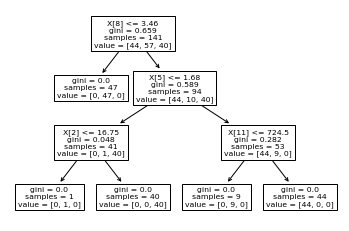

In [12]:
# tree visualization
from sklearn import tree
tree.plot_tree(clf)

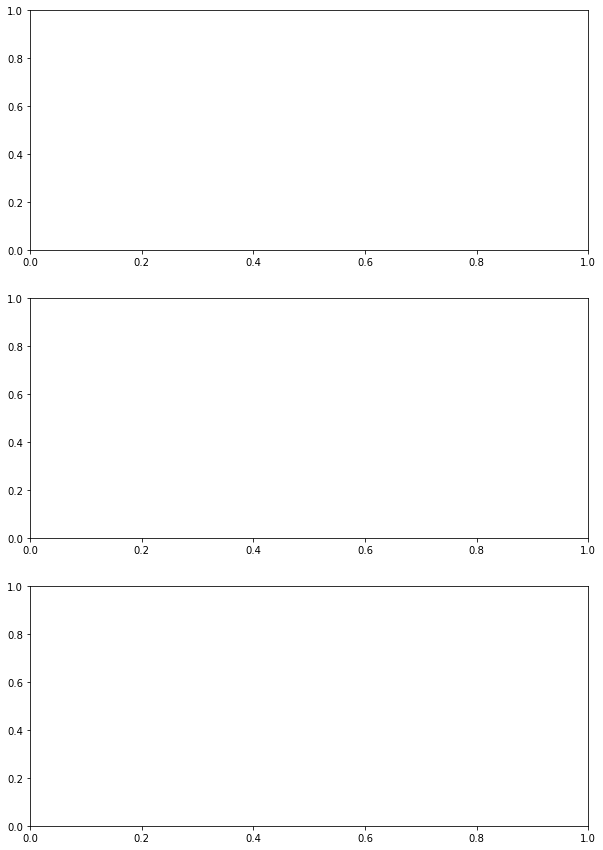

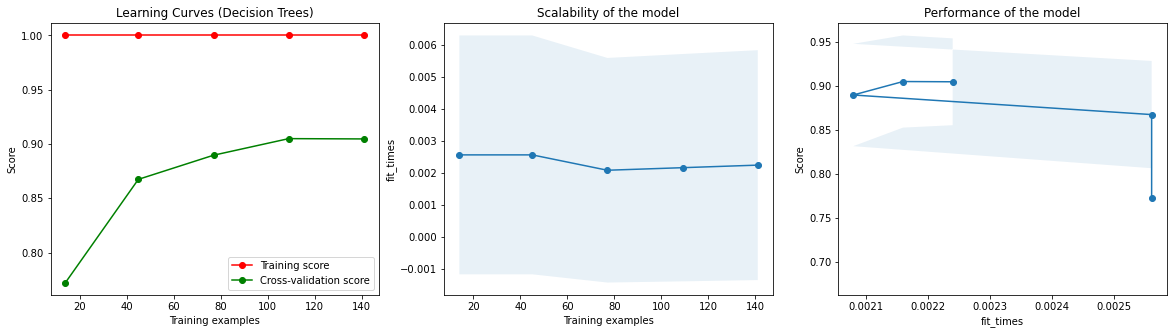

In [13]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):

    
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")
    
    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, return_times = True)
              
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)
    
    # Plot learning curve
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    axes[0].legend(loc="best")
    
     # Plot n_samples vs fit_times
    #axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std, fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    #axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

#fig, (ax1, ax2) = plt.subplots(1, 2)
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

#X, y = load_digits(return_X_y=True)

title = "Learning Curves (Decision Trees)"

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = DecisionTreeClassifier()
plot_learning_curve(estimator, title, X, y, axes = None, cv=cv, n_jobs =4)
#plot_learning_curve(estimator, X, y, title, axes = axes[:, 0], cv=cv, train_sizes=np.linspace(.1, 1.0, 5))
#plot_learning_curve(estimator, X, y, ax = ax2, cv=cv, train_sizes=np.linspace(.5, 1.0, 5))

plt.show()


In [17]:
# pruning the tree by setting the max_depth to 3
import time
start = time.time()
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
clf.fit(X_train, y_train)
clf_predict = clf.predict(X_test)
clf_accuracy = accuracy_score(y_test, clf_predict)
mse= mean_squared_error(y_test, clf_predict)
mae = mean_absolute_error(y_test, clf_predict)
pre = precision_score(y_test, clf_predict, average = 'weighted')
rec = recall_score(y_test, clf_predict, average = 'weighted')
print("accuracy =", clf_accuracy)
print("mse=", mse)
print("mae=", mae)
print("pre=", pre)
print("rec=", rec)
end= time.time()
print (end - start)

accuracy = 0.8611111111111112
mse= 0.2222222222222222
mae= 0.16666666666666666
pre= 0.8611111111111112
rec= 0.8611111111111112
0.016000032424926758


[Text(148.8, 190.26, 'X[10] <= 2.19\nentropy = 1.568\nsamples = 141\nvalue = [44, 57, 40]'),
 Text(74.4, 135.9, 'X[8] <= 3.825\nentropy = 0.503\nsamples = 45\nvalue = [0, 5, 40]'),
 Text(37.2, 81.53999999999999, 'entropy = 0.0\nsamples = 5\nvalue = [0, 5, 0]'),
 Text(111.60000000000001, 81.53999999999999, 'entropy = 0.0\nsamples = 40\nvalue = [0, 0, 40]'),
 Text(223.20000000000002, 135.9, 'X[11] <= 726.5\nentropy = 0.995\nsamples = 96\nvalue = [44, 52, 0]'),
 Text(186.0, 81.53999999999999, 'entropy = 0.0\nsamples = 48\nvalue = [0, 48, 0]'),
 Text(260.40000000000003, 81.53999999999999, 'X[8] <= 3.46\nentropy = 0.414\nsamples = 48\nvalue = [44, 4, 0]'),
 Text(223.20000000000002, 27.180000000000007, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4, 0]'),
 Text(297.6, 27.180000000000007, 'entropy = 0.0\nsamples = 44\nvalue = [44, 0, 0]')]

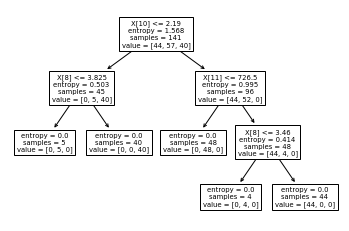

In [16]:
# tree visualization
from sklearn import tree
tree.plot_tree(clf)

# Neural Network classification

In [18]:
mlp = MLPClassifier(hidden_layer_sizes = 10, activation = 'identity')
mlp.fit(X_train, y_train)
mlp_predict = mlp.predict(X_test)
mlp_accuracy = accuracy_score(y_test, mlp_predict)
mse= mean_squared_error(y_test, mlp_predict)
mae = mean_absolute_error(y_test, mlp_predict)
pre = precision_score(y_test, mlp_predict, average = 'weighted')
rec = recall_score(y_test, mlp_predict, average = 'weighted')
print("accuracy =", mlp_accuracy)
print("mse=", mse)
print("mae=", mae)
print("pre=", pre)
print("rec=", rec)


accuracy = 0.5
mse= 0.9166666666666666
mae= 0.6388888888888888
pre= 0.4837662337662338
rec= 0.5


In [19]:
#activation function 'tanh'
mlp = MLPClassifier(hidden_layer_sizes = 10, activation = 'tanh')
mlp.fit(X_train, y_train)
mlp_predict = mlp.predict(X_test)
mlp_accuracy = accuracy_score(y_test, mlp_predict)
mse= mean_squared_error(y_test, mlp_predict)
mae = mean_absolute_error(y_test, mlp_predict)
pre = precision_score(y_test, mlp_predict, average = 'weighted')
rec = recall_score(y_test, mlp_predict, average = 'weighted')
print("accuracy =", mlp_accuracy)
print("mse=", mse)
print("mae=", mae)
print("pre=", pre)
print("rec=", rec)

accuracy = 0.6666666666666666
mse= 0.4166666666666667
mae= 0.3611111111111111
pre= 0.5713131313131313
rec= 0.6666666666666666


C:\Users\shenl\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\shenl\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
#activation function 'relu'
mlp = MLPClassifier(hidden_layer_sizes = 10, activation = 'relu')
mlp.fit(X_train, y_train)
mlp_predict = mlp.predict(X_test)
mlp_accuracy = accuracy_score(y_test, mlp_predict)
mse= mean_squared_error(y_test, mlp_predict)
mae = mean_absolute_error(y_test, mlp_predict)
pre = precision_score(y_test, mlp_predict, average = 'weighted')
rec = recall_score(y_test, mlp_predict, average = 'weighted')
print("accuracy =", mlp_accuracy)
print("mse=", mse)
print("mae=", mae)
print("pre=", pre)
print("rec=", rec)

accuracy = 0.2222222222222222
mse= 1.9444444444444444
mae= 1.1666666666666667
pre= 0.04938271604938271
rec= 0.2222222222222222


C:\Users\shenl\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
#activation function 'logistic'
import time
start = time.time()
mlp = MLPClassifier(hidden_layer_sizes = 100, activation = 'logistic')
mlp.fit(X_train, y_train)
mlp_predict = mlp.predict(X_test)
mlp_accuracy = accuracy_score(y_test, mlp_predict)
mse= mean_squared_error(y_test, mlp_predict)
mae = mean_absolute_error(y_test, mlp_predict)
pre = precision_score(y_test, mlp_predict, average = 'weighted')
rec = recall_score(y_test, mlp_predict, average = 'weighted')
print("accuracy =", mlp_accuracy)
print("mse=", mse)
print("mae=", mae)
print("pre=", pre)
print("rec=", rec)
end = time.time()
print (end - start)

accuracy = 0.8888888888888888
mse= 0.1111111111111111
mae= 0.1111111111111111
pre= 0.902391975308642
rec= 0.8888888888888888
0.15926194190979004


C:\Users\shenl\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [22]:
#increase the layer size from 10 to 50
import time
start = time.time()
mlp = MLPClassifier(hidden_layer_sizes = 50, activation = 'relu')
mlp.fit(X_train, y_train)
mlp_predict = mlp.predict(X_test)
mlp_accuracy = accuracy_score(y_test, mlp_predict)
mse= mean_squared_error(y_test, mlp_predict)
mae = mean_absolute_error(y_test, mlp_predict)
pre = precision_score(y_test, mlp_predict, average = 'weighted')
rec = recall_score(y_test, mlp_predict, average = 'weighted')
print("accuracy =", mlp_accuracy)
print("mse=", mse)
print("mae=", mae)
print("pre=", pre)
print("rec=", rec)
end = time.time()
print("elapsed time:", end - start)

accuracy = 0.6666666666666666
mse= 0.4166666666666667
mae= 0.3611111111111111
pre= 0.5713131313131313
rec= 0.6666666666666666
elapsed time: 0.039965152740478516


C:\Users\shenl\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
#increase the layer size from 10 to 100
mlp = MLPClassifier(hidden_layer_sizes = 100, activation = 'relu')
mlp.fit(X_train, y_train)
mlp_predict = mlp.predict(X_test)
mlp_accuracy = accuracy_score(y_test, mlp_predict)
mse= mean_squared_error(y_test, mlp_predict)
mae = mean_absolute_error(y_test, mlp_predict)
pre = precision_score(y_test, mlp_predict, average = 'weighted')
rec = recall_score(y_test, mlp_predict, average = 'weighted')
print("accuracy =", mlp_accuracy)
print("mse=", mse)
print("mae=", mae)
print("pre=", pre)
print("rec=", rec)

accuracy = 0.75
mse= 0.4166666666666667
mae= 0.3055555555555556
pre= 0.7574074074074074
rec= 0.75


C:\Users\shenl\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


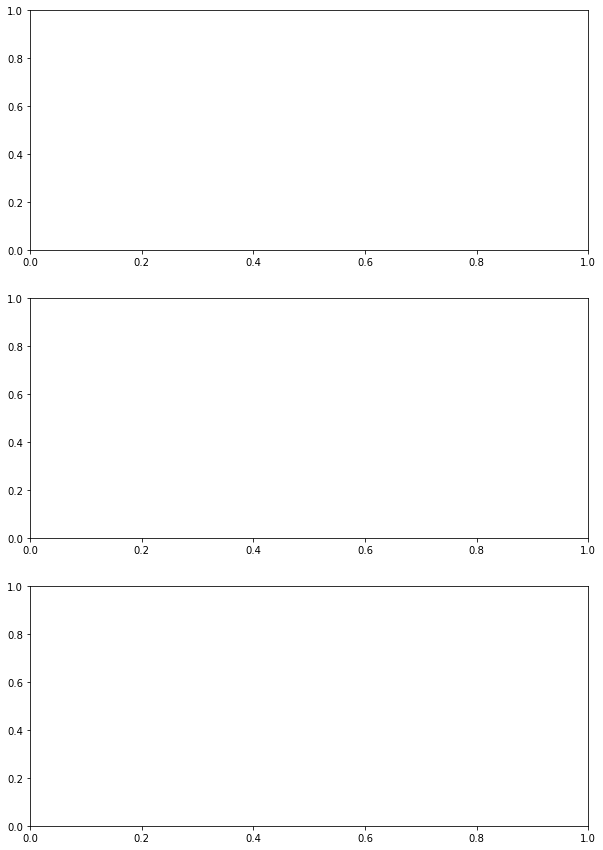

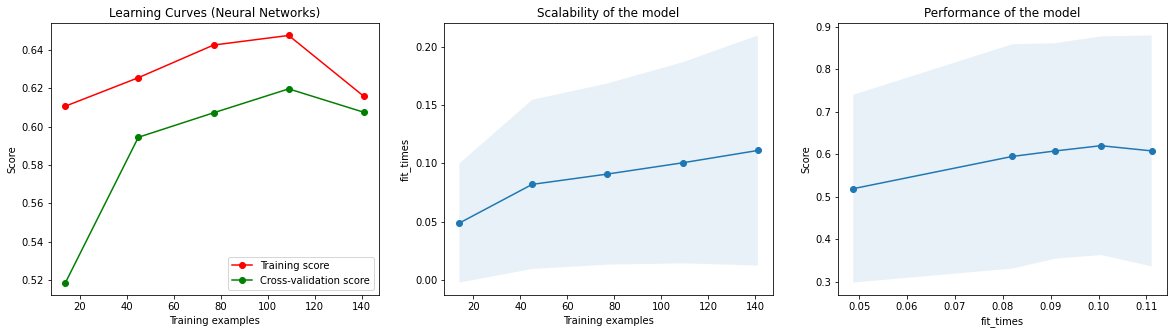

In [24]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):

    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, return_times = True)
              
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)
    
    # Plot learning curve
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    axes[0].legend(loc="best")
    
     # Plot n_samples vs fit_times
    #axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std, fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    #axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

#fig, (ax1, ax2) = plt.subplots(1, 2)
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

#X, y = load_digits(return_X_y=True)

title = "Learning Curves (Neural Networks)"

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = MLPClassifier()
plot_learning_curve(estimator, title, X, y, axes = None, cv=cv, n_jobs =4)
#plot_learning_curve(estimator, X, y, title, axes = axes[:, 0], cv=cv, train_sizes=np.linspace(.1, 1.0, 5))
#plot_learning_curve(estimator, X, y, ax = ax2, cv=cv, train_sizes=np.linspace(.5, 1.0, 5))

plt.show()


# Boosting

In [29]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
gbc_predict = gbc.predict(X_test)
gbc_accuracy = accuracy_score(y_test, gbc_predict)
mse= mean_squared_error(y_test, gbc_predict)
mae = mean_absolute_error(y_test, gbc_predict)
pre = precision_score(y_test, gbc_predict, average = 'weighted')
rec = recall_score(y_test, gbc_predict, average = 'weighted')
print("accuracy =", gbc_accuracy)
print("mse=", mse)
print("mae=", mae)
print("pre=", pre)
print("rec=", rec)

accuracy = 0.8611111111111112
mse= 0.2222222222222222
mae= 0.16666666666666666
pre= 0.8611111111111112
rec= 0.8611111111111112


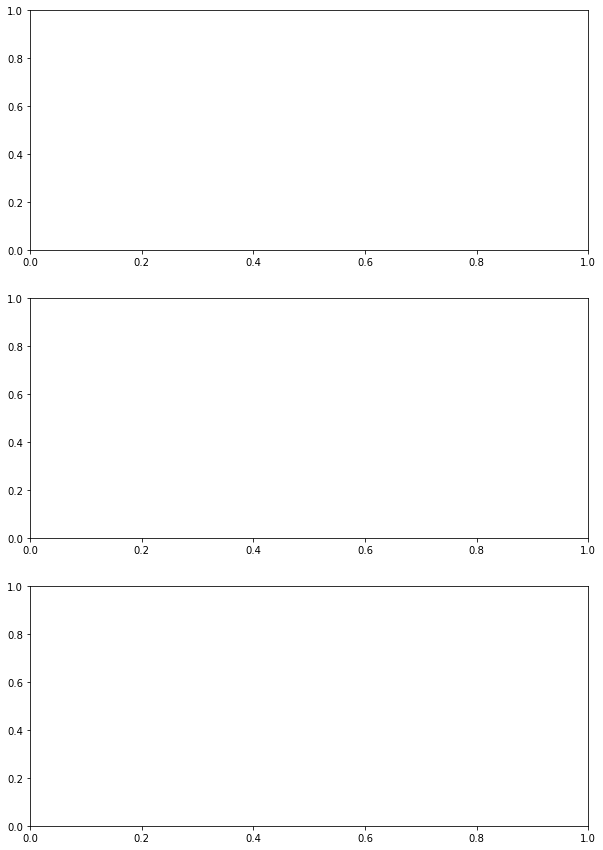

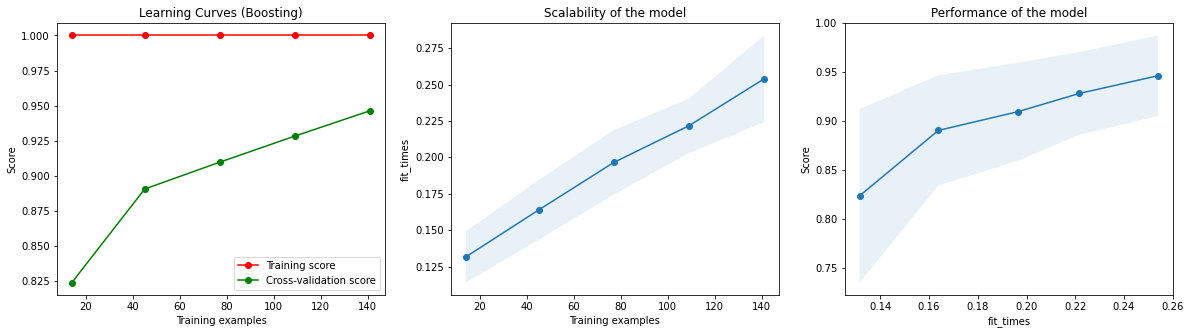

In [30]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):

    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, return_times = True)
              
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)
    
    # Plot learning curve
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    axes[0].legend(loc="best")
    
     # Plot n_samples vs fit_times
    #axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std, fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    #axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

#fig, (ax1, ax2) = plt.subplots(1, 2)
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

#X, y = load_digits(return_X_y=True)

title = "Learning Curves (Boosting)"

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = GradientBoostingClassifier()
plot_learning_curve(estimator, title, X, y, axes = None, cv=cv, n_jobs =4)
#plot_learning_curve(estimator, X, y, title, axes = axes[:, 0], cv=cv, train_sizes=np.linspace(.1, 1.0, 5))
#plot_learning_curve(estimator, X, y, ax = ax2, cv=cv, train_sizes=np.linspace(.5, 1.0, 5))

plt.show()


In [31]:
gbc = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 3, random_state = 0)
gbc.fit(X_train, y_train)
gbc_predict = gbc.predict(X_test)
gbc_accuracy = accuracy_score(y_test, gbc_predict)
mse= mean_squared_error(y_test, gbc_predict)
mae = mean_absolute_error(y_test, gbc_predict)
pre = precision_score(y_test, gbc_predict, average = 'weighted')
rec = recall_score(y_test, gbc_predict, average = 'weighted')
print("accuracy =", gbc_accuracy)
print("mse=", mse)
print("mae=", mae)
print("pre=", pre)
print("rec=", rec)

accuracy = 0.8611111111111112
mse= 0.2222222222222222
mae= 0.16666666666666666
pre= 0.8611111111111112
rec= 0.8611111111111112


In [32]:
gbc = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 2, random_state = 0)
gbc.fit(X_train, y_train)
gbc_predict = gbc.predict(X_test)
gbc_accuracy = accuracy_score(y_test, gbc_predict)
mse= mean_squared_error(y_test, gbc_predict)
mae = mean_absolute_error(y_test, gbc_predict)
pre = precision_score(y_test, gbc_predict, average = 'weighted')
rec = recall_score(y_test, gbc_predict, average = 'weighted')
print("accuracy =", gbc_accuracy)
print("mse=", mse)
print("mae=", mae)
print("pre=", pre)
print("rec=", rec)

accuracy = 0.9166666666666666
mse= 0.08333333333333333
mae= 0.08333333333333333
pre= 0.9256410256410257
rec= 0.9166666666666666


In [34]:
import time
start = time.time()
gbc = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 1, random_state = 0)
gbc.fit(X_train, y_train)
gbc_predict = gbc.predict(X_test)
gbc_accuracy = accuracy_score(y_test, gbc_predict)
mse= mean_squared_error(y_test, gbc_predict)
mae = mean_absolute_error(y_test, gbc_predict)
pre = precision_score(y_test, gbc_predict, average = 'weighted')
rec = recall_score(y_test, gbc_predict, average = 'weighted')
print("accuracy =", gbc_accuracy)
print("mse=", mse)
print("mae=", mae)
print("pre=", pre)
print("rec=", rec)
end = time.time()
print(end - start)

accuracy = 0.9444444444444444
mse= 0.05555555555555555
mae= 0.05555555555555555
pre= 0.9555555555555555
rec= 0.9444444444444444
0.15854954719543457


# Support Vector Machine

In [35]:
svc = SVC(C= 1.0, kernel = 'rbf')
svc.fit(X_train, y_train)
svc_predict = svc.predict(X_test)
svc_accuracy = accuracy_score(y_test, svc_predict)
mse= mean_squared_error(y_test, svc_predict)
mae = mean_absolute_error(y_test, svc_predict)
pre = precision_score(y_test, svc_predict, average = 'weighted')
rec = recall_score(y_test, svc_predict, average = 'weighted')
print("accuracy =", svc_accuracy)
print("mse=", mse)
print("mae=", mae)
print("pre=", pre)
print("rec=", rec)

accuracy = 0.75
mse= 0.5833333333333334
mae= 0.3611111111111111
pre= 0.785039941902687
rec= 0.75


In [36]:
svc = SVC(C = 0.1)
svc.fit(X_train, y_train)
svc_predict = svc.predict(X_test)
svc_accuracy = accuracy_score(y_test, svc_predict)
mse= mean_squared_error(y_test, svc_predict)
mae = mean_absolute_error(y_test, svc_predict)
pre = precision_score(y_test, svc_predict, average = 'weighted')
rec = recall_score(y_test, svc_predict, average = 'weighted')
print("accuracy =", svc_accuracy)
print("mse=", mse)
print("mae=", mae)
print("pre=", pre)
print("rec=", rec)

accuracy = 0.6666666666666666
mse= 0.3333333333333333
mae= 0.3333333333333333
pre= 0.5982905982905984
rec= 0.6666666666666666


C:\Users\shenl\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
svc = SVC(C = 100)
svc.fit(X_train, y_train)
svc_predict = svc.predict(X_test)
svc_accuracy = accuracy_score(y_test, svc_predict)
mse= mean_squared_error(y_test, svc_predict)
mae = mean_absolute_error(y_test, svc_predict)
pre = precision_score(y_test, svc_predict, average = 'weighted')
rec = recall_score(y_test, svc_predict, average = 'weighted')
print("accuracy =", svc_accuracy)
print("mse=", mse)
print("mae=", mae)
print("pre=", pre)
print("rec=", rec)

accuracy = 0.7777777777777778
mse= 0.3888888888888889
mae= 0.2777777777777778
pre= 0.7962962962962963
rec= 0.7777777777777778


In [38]:
svc = SVC(C = 1000)
svc.fit(X_train, y_train)
svc_predict = svc.predict(X_test)
svc_accuracy = accuracy_score(y_test, svc_predict)
mse= mean_squared_error(y_test, svc_predict)
mae = mean_absolute_error(y_test, svc_predict)
pre = precision_score(y_test, svc_predict, average = 'weighted')
rec = recall_score(y_test, svc_predict, average = 'weighted')
print("accuracy =", svc_accuracy)
print("mse=", mse)
print("mae=", mae)
print("pre=", pre)
print("rec=", rec)

accuracy = 0.9166666666666666
mse= 0.16666666666666666
mae= 0.1111111111111111
pre= 0.9214743589743589
rec= 0.9166666666666666


In [42]:
import time
start = time.time()
svc = SVC(C= 1.0, kernel = 'linear')
svc.fit(X_train, y_train)
svc_predict = svc.predict(X_test)
svc_accuracy = accuracy_score(y_test, svc_predict)
mse= mean_squared_error(y_test, svc_predict)
mae = mean_absolute_error(y_test, svc_predict)
pre = precision_score(y_test, svc_predict, average = 'weighted')
rec = recall_score(y_test, svc_predict, average = 'weighted')
print("accuracy =", svc_accuracy)
print("mse=", mse)
print("mae=", mae)
print("pre=", pre)
print("rec=", rec)
end = time.time()
print (end - start)

accuracy = 0.9166666666666666
mse= 0.08333333333333333
mae= 0.08333333333333333
pre= 0.9256410256410257
rec= 0.9166666666666666
0.0560297966003418


In [40]:
svc = SVC(C= 1.0, kernel = 'poly')
svc.fit(X_train, y_train)
svc_predict = svc.predict(X_test)
svc_accuracy = accuracy_score(y_test, svc_predict)
mse= mean_squared_error(y_test, svc_predict)
mae = mean_absolute_error(y_test, svc_predict)
pre = precision_score(y_test, svc_predict, average = 'weighted')
rec = recall_score(y_test, svc_predict, average = 'weighted')
print("accuracy =", svc_accuracy)
print("mse=", mse)
print("mae=", mae)
print("pre=", pre)
print("rec=", rec)

accuracy = 0.75
mse= 0.4166666666666667
mae= 0.3055555555555556
pre= 0.7361673414304993
rec= 0.75


In [41]:
svc = SVC(C= 1.0, kernel = 'sigmoid')
svc.fit(X_train, y_train)
svc_predict = svc.predict(X_test)
svc_accuracy = accuracy_score(y_test, svc_predict)
mse= mean_squared_error(y_test, svc_predict)
mae = mean_absolute_error(y_test, svc_predict)
pre = precision_score(y_test, svc_predict, average = 'weighted')
rec = recall_score(y_test, svc_predict, average = 'weighted')
print("accuracy =", svc_accuracy)
print("mse=", mse)
print("mae=", mae)
print("pre=", pre)
print("rec=", rec)

accuracy = 0.16666666666666666
mse= 1.25
mae= 0.9722222222222222
pre= 0.11851851851851852
rec= 0.16666666666666666


C:\Users\shenl\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# K Nearest Neighbour

Automatically created module for IPython interactive environment


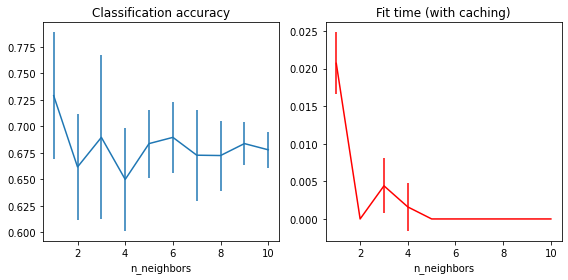

In [47]:
from tempfile import TemporaryDirectory
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsTransformer, KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_digits
from sklearn.pipeline import Pipeline

print(__doc__)

#X, y = load_digits(return_X_y=True)
#n_neighbors_list = [1, 2, 3, 4, 5, 6, 7, 8, 9,10,20,30,40,50,60,70,80,90,100]
n_neighbors_list = [1, 2, 3, 4, 5, 6, 7, 8, 9,10]

# The transformer computes the nearest neighbors graph using the maximum number
# of neighbors necessary in the grid search. The classifier model filters the
# nearest neighbors graph as required by its own n_neighbors parameter.
graph_model = KNeighborsTransformer(n_neighbors=max(n_neighbors_list),
                                    mode='distance')
classifier_model = KNeighborsClassifier(metric='precomputed')

# Note that we give `memory` a directory to cache the graph computation
# that will be used several times when tuning the hyperparameters of the
# classifier.
with TemporaryDirectory(prefix="sklearn_graph_cache_") as tmpdir:
    full_model = Pipeline(
        steps=[('graph', graph_model), ('classifier', classifier_model)],
        memory=tmpdir)

    param_grid = {'classifier__n_neighbors': n_neighbors_list}
    grid_model = GridSearchCV(full_model, param_grid)
    grid_model.fit(X, y)

# Plot the results of the grid search.
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].errorbar(x=n_neighbors_list,
                 y=grid_model.cv_results_['mean_test_score'],
                 yerr=grid_model.cv_results_['std_test_score'])
axes[0].set(xlabel='n_neighbors', title='Classification accuracy')
axes[1].errorbar(x=n_neighbors_list, y=grid_model.cv_results_['mean_fit_time'],
                 yerr=grid_model.cv_results_['std_fit_time'], color='r')
axes[1].set(xlabel='n_neighbors', title='Fit time (with caching)')
fig.tight_layout()
plt.show()

In [48]:
import time
start = time.time()
knn = KNeighborsClassifier(n_neighbors =1)
knn.fit(X_train, y_train)
knn_predict = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predict)
mse= mean_squared_error(y_test, knn_predict)
mae = mean_absolute_error(y_test, knn_predict)
pre = precision_score(y_test, knn_predict, average = 'weighted')
rec = recall_score(y_test, knn_predict, average = 'weighted')
print("accuracy =", knn_accuracy)
print("mse=", mse)
print("mae=", mae)
print("pre=", pre)
print("rec=", rec)
end = time.time()
print("elapsed time:", end - start)

accuracy = 0.6944444444444444
mse= 0.6388888888888888
mae= 0.4166666666666667
pre= 0.7170940170940171
rec= 0.6944444444444444
elapsed time: 0.008004188537597656


In [49]:
import time
start = time.time()
knn = KNeighborsClassifier(n_neighbors =2)
knn.fit(X_train, y_train)
knn_predict = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predict)
mse= mean_squared_error(y_test, knn_predict)
mae = mean_absolute_error(y_test, knn_predict)
pre = precision_score(y_test, knn_predict, average = 'weighted')
rec = recall_score(y_test, knn_predict, average = 'weighted')
print("accuracy =", knn_accuracy)
print("mse=", mse)
print("mae=", mae)
print("pre=", pre)
print("rec=", rec)
end = time.time()
print(end - start)

accuracy = 0.6944444444444444
mse= 0.6388888888888888
mae= 0.4166666666666667
pre= 0.7034662867996201
rec= 0.6944444444444444
0.015997648239135742


In [51]:
import time
start = time.time()
knn = KNeighborsClassifier(n_neighbors =50)
knn.fit(X_train, y_train)
knn_predict = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predict)
mse= mean_squared_error(y_test, knn_predict)
mae = mean_absolute_error(y_test, knn_predict)
pre = precision_score(y_test, knn_predict, average = 'weighted')
rec = recall_score(y_test, knn_predict, average = 'weighted')
print("accuracy =", knn_accuracy)
print("mse=", mse)
print("mae=", mae)
print("pre=", pre)
print("rec=", rec)
end = time.time()
print(end - start)

accuracy = 0.6944444444444444
mse= 0.6388888888888888
mae= 0.4166666666666667
pre= 0.7959595959595959
rec= 0.6944444444444444
0.009973287582397461


In [52]:
import time
start = time.time()
knn = KNeighborsClassifier(n_neighbors =100)
knn.fit(X_train, y_train)
knn_predict = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predict)
mse= mean_squared_error(y_test, knn_predict)
mae = mean_absolute_error(y_test, knn_predict)
pre = precision_score(y_test, knn_predict, average = 'weighted')
rec = recall_score(y_test, knn_predict, average = 'weighted')
print("accuracy =", knn_accuracy)
print("mse=", mse)
print("mae=", mae)
print("pre=", pre)
print("rec=", rec)
end = time.time()
print(end - start)

accuracy = 0.6944444444444444
mse= 0.4722222222222222
mae= 0.3611111111111111
pre= 0.6996779388083736
rec= 0.6944444444444444
0.007975101470947266


# Discussion: time, grid search, cross validation